In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import shutil
import zipfile

# Укажите путь к zip-файлу на Google Диске
zip_file_path = '/content/drive/MyDrive/Model1/dataset_1.0.zip'

# Укажите путь, куда вы хотите скопировать zip-файл в Google Colab
dest_zip_path = '/content/dataset_1.0.zip'

# Копируйте zip-файл с Google Диска в Google Colab
shutil.copyfile(zip_file_path, dest_zip_path)

# Распакуйте zip-файл
with zipfile.ZipFile(dest_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')


In [ ]:
# Импорт библиотек
import os

# Определение путей к папкам
train_image_folder = '/content/dataset_1.0/train/images'
train_label_folder = '/content/dataset_1.0/train/labels'
val_image_folder = '/content/dataset_1.0/val/images'
val_label_folder = '/content/dataset_1.0/val/labels'
test_image_folder = '/content/dataset_1.0/test/images'
test_label_folder = '/content/dataset_1.0/test/labels'

# Список файлов для удаления
files_to_remove = [
    'DS1_02_0432.txt', 'DS1_02_0494.txt', 'DS1_02_0050.txt',
    'DS1_02_0423.txt', 'DS1_02_0461.txt', 'DS1_02_0443.txt',
    'DS1_YM2_306.txt', 'DS1_02_0448.txt', 'DS1_02_0518.txt',
    'DS1_02_0490.txt', 'DS1_02_0040.txt', 'DS1_02_0043.txt',
    'DS1_02_0420.txt', 'DS1_02_0034.txt', 'DS1_02_0676.txt',
    'DS1_02_0465.txt', 'DS1_02_0027.txt', 'DS1_02_0454.txt',
    'DS1_02_0499.txt', 'DS1_02_0437.txt', 'DS1_02_0414.txt',
    'DS1_02_0469.txt', 'DS1_YM2_327.txt', 'DS1_9_285.txt',
    'DS1_9_281.txt', 'DS1_9_377.txt','DS1_02_2862.txt','DS1_02_2147.txt'
]

# Функция для удаления файлов
def remove_files(folder, files):
    removed_files = []
    for file in files:
        file_path_txt = os.path.join(folder, file)
        file_path_jpg = os.path.join(folder, file.replace('.txt', '.jpg'))

        if os.path.exists(file_path_txt):
            os.remove(file_path_txt)
            removed_files.append(file)

        if os.path.exists(file_path_jpg):
            os.remove(file_path_jpg)
            removed_files.append(file.replace('.txt', '.jpg'))

    return removed_files

# Удаление файлов из тренировочной, валидационной и тестовой папок
removed_train = remove_files(train_label_folder, files_to_remove)
removed_val = remove_files(val_label_folder, files_to_remove)
removed_test = remove_files(test_label_folder, files_to_remove)

removed_train, removed_val, removed_test
try:
    removed_train = remove_files(train_label_folder, files_to_remove)
    removed_val = remove_files(val_label_folder, files_to_remove)
    removed_test = remove_files(test_label_folder, files_to_remove)

    print("Удалены файлы из тренировочной папки:", removed_train)
    print("Удалены файлы из валидационной папки:", removed_val)
    print("Удалены файлы из тестовой папки:", removed_test)

except Exception as e:
    print("Произошла ошибка при удалении файлов:", str(e))

Удалены файлы из тренировочной папки: []
Удалены файлы из валидационной папки: []
Удалены файлы из тестовой папки: []


In [ ]:
# Импорт необходимых библиотек для работы с YOLO и обучения модели
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Импорт библиотек для работы с файловой системой и визуализации
import os
import matplotlib.pyplot as plt

print("Библиотеки успешно импортированы.")


Библиотеки успешно импортированы.


In [ ]:

!git clone https://github.com/ultralytics/ultralytics.git

fatal: destination path 'ultralytics' already exists and is not an empty directory.


In [ ]:

!pip install ultralytics==8.0.20
from IPython import display
display.clear_output()



In [ ]:
import yaml

with open("/content/data4.yaml", 'r') as stream:
    try:
        data = yaml.safe_load(stream)
        print("Пути в YAML-файле после обновления:")
        print(data)
    except yaml.YAMLError as exc:
        print(exc)


Пути в YAML-файле после обновления:
{'names': ['Agricultural object', 'Fields', 'Forest', 'Grassland', 'Industrial facility', 'Power lines', 'Public facility', 'Residential facility', 'Road', 'Water'], 'nc': 10, 'test': '/content/dataset_1.0/test/images', 'test_labels': '/content/dataset_1.0/test/labels', 'train': '/content/dataset_1.0/train/images', 'train_labels': '/content/dataset_1.0/train/labels', 'val': '/content/dataset_1.0/valid/images', 'val_labels': '/content/dataset_1.0/valid/labels'}


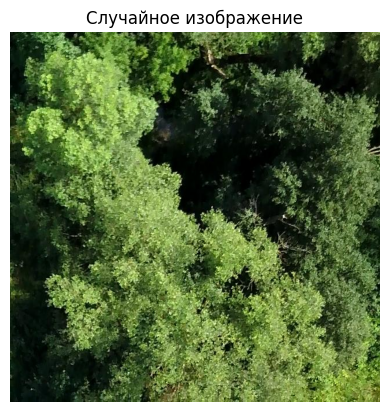

In [ ]:
import os
import random
import cv2
from matplotlib import pyplot as plt

# Укажите путь к папке с изображениями
image_folder = '/content/dataset_1.0/train/images'

# Получите список всех файлов в папке
image_files = os.listdir(image_folder)

# Выберите случайное изображение из списка
random_image = random.choice(image_files)

# Получите полный путь к выбранному изображению
image_path = os.path.join(image_folder, random_image)

# Загрузите и отобразите выбранное изображение
try:
    image = cv2.imread(image_path)

    # Проверьте, удалось ли загрузить изображение
    if image is not None:
        # Отобразите изображение с помощью matplotlib
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Случайное изображение')
        plt.axis('off')
        plt.show()
    else:
        print(f'Не удалось загрузить изображение по пути: {image_path}')
except Exception as e:
    print(f'Произошла ошибка при загрузке изображения: {str(e)}')


In [ ]:
# Importing necessary libraries
import os
import shutil

# Function to check and move unmatching image-label pairs
def check_and_move_unmatching(image_folder, label_folder, quarantine_folder):
    moved_files = []

    image_files = set(os.path.splitext(f)[0] for f in os.listdir(image_folder))
    label_files = set(os.path.splitext(f)[0] for f in os.listdir(label_folder))

    unmatching_images = image_files - label_files
    unmatching_labels = label_files - image_files

    for img in unmatching_images:
        src = os.path.join(image_folder, img + '.jpg')
        dst = os.path.join(quarantine_folder, 'unmatching_images', img + '.jpg')
        shutil.move(src, dst)
        moved_files.append(img + '.jpg')

    for lbl in unmatching_labels:
        src = os.path.join(label_folder, lbl + '.txt')
        dst = os.path.join(quarantine_folder, 'unmatching_labels', lbl + '.txt')
        shutil.move(src, dst)
        moved_files.append(lbl + '.txt')

    return moved_files

# Function to check for empty label files
def check_and_move_empty(label_folder, quarantine_folder):
    empty_files = []

    for lbl_file in os.listdir(label_folder):
        path = os.path.join(label_folder, lbl_file)
        if os.path.getsize(path) == 0:
            dst = os.path.join(quarantine_folder, 'empty_labels', lbl_file)
            shutil.move(path, dst)
            empty_files.append(lbl_file)

    return empty_files

# Define paths from data.yaml output
train_image_folder = '/content/dataset_1.0/train/images'
train_label_folder = '/content/dataset_1.0/train/labels'
val_image_folder = '/content/dataset_1.0/valid/images'
val_label_folder = '/content/dataset_1.0/valid/labels'
test_image_folder = '/content/dataset_1.0/test/images'
test_label_folder = '/content/dataset_1.0/test/labels'

# Quarantine folder
quarantine_folder = '/content/quarantine'

# Create subfolders in quarantine folder if they do not exist
os.makedirs(os.path.join(quarantine_folder, 'unmatching_images'), exist_ok=True)
os.makedirs(os.path.join(quarantine_folder, 'unmatching_labels'), exist_ok=True)
os.makedirs(os.path.join(quarantine_folder, 'empty_labels'), exist_ok=True)

# Check and move unmatching and empty files
moved_train = check_and_move_unmatching(train_image_folder, train_label_folder, quarantine_folder)
moved_val = check_and_move_unmatching(val_image_folder, val_label_folder, quarantine_folder)
moved_test = check_and_move_unmatching(test_image_folder, test_label_folder, quarantine_folder)

empty_train = check_and_move_empty(train_label_folder, quarantine_folder)
empty_val = check_and_move_empty(val_label_folder, quarantine_folder)
empty_test = check_and_move_empty(test_label_folder, quarantine_folder)

moved_train, moved_val, moved_test, empty_train, empty_val, empty_test


(['DS1_02_0040.jpg',
  'DS1_02_2147.jpg',
  'DS1_YM2_306.jpg',
  'DS1_02_0518.jpg',
  'DS1_02_0499.jpg',
  'DS1_02_0465.jpg',
  'DS1_02_0437.jpg',
  'DS1_02_0034.jpg',
  'DS1_02_0448.jpg',
  'DS1_02_2862.jpg',
  'DS1_02_0454.jpg',
  'DS1_02_0490.jpg',
  'DS1_02_0469.jpg',
  'DS1_02_0027.jpg',
  'DS1_02_0676.jpg',
  'DS1_02_0461.jpg',
  'DS1_02_0423.jpg',
  'DS1_02_0443.jpg',
  'DS1_02_0050.jpg',
  'DS1_02_0414.jpg',
  'DS1_02_0432.jpg',
  'DS1_02_0420.jpg',
  'DS1_02_0043.jpg',
  'DS1_02_0494.jpg'],
 [],
 ['DS1_YM2_327.jpg', 'DS1_9_281.jpg', 'DS1_9_285.jpg'],
 [],
 [],
 [])

In [ ]:
# Функция для вывода содержимого карантинной папки и списка пустых файлов
def print_quarantine_report(quarantine_folder):
    unmatching_images = os.listdir(os.path.join(quarantine_folder, 'unmatching_images'))
    unmatching_labels = os.listdir(os.path.join(quarantine_folder, 'unmatching_labels'))
    empty_labels = os.listdir(os.path.join(quarantine_folder, 'empty_labels'))

    print("Отчёт о карантинной папке:")
    print("----------------------------")
    print(f"Несоответствующие изображения: {len(unmatching_images)} файлов")
    for img in unmatching_images:
        print(f"  - {img}")

    print(f"\nНесоответствующие метки: {len(unmatching_labels)} файлов")
    for lbl in unmatching_labels:
        print(f"  - {lbl}")

    print(f"\nПустые файлы меток: {len(empty_labels)} файлов")
    for lbl in empty_labels:
        print(f"  - {lbl}")
    print("----------------------------")

# Путь к карантинной папке
quarantine_folder = '/content/quarantine'

# Вывод отчёта
print_quarantine_report(quarantine_folder)


Отчёт о карантинной папке:
----------------------------
Несоответствующие изображения: 27 файлов
  - DS1_9_285.jpg
  - DS1_02_2862.jpg
  - DS1_02_0043.jpg
  - DS1_02_0676.jpg
  - DS1_02_0518.jpg
  - DS1_YM2_327.jpg
  - DS1_02_0423.jpg
  - DS1_02_0027.jpg
  - DS1_02_0432.jpg
  - DS1_02_0034.jpg
  - DS1_02_0461.jpg
  - DS1_02_0469.jpg
  - DS1_YM2_306.jpg
  - DS1_02_0443.jpg
  - DS1_02_0448.jpg
  - DS1_02_0420.jpg
  - DS1_02_0050.jpg
  - DS1_02_2147.jpg
  - DS1_02_0494.jpg
  - DS1_02_0499.jpg
  - DS1_02_0454.jpg
  - DS1_9_281.jpg
  - DS1_02_0437.jpg
  - DS1_02_0414.jpg
  - DS1_02_0490.jpg
  - DS1_02_0465.jpg
  - DS1_02_0040.jpg

Несоответствующие метки: 0 файлов

Пустые файлы меток: 0 файлов
----------------------------


In [ ]:
# Импорт необходимых библиотек
import os

# Функция для проверки наличия пары .jpg для пустого .txt файла
def check_and_move_unmatched_jpgs(empty_label_folder, image_folders, quarantine_folder):
    no_pair_files = []
    for txt_file in os.listdir(empty_label_folder):
        base_name = os.path.splitext(txt_file)[0]  # Получаем имя файла без расширения
        has_pair = False  # Флаг наличия пары

        # Проверяем наличие пары в каждой из папок с изображениями (train, val, test)
        for img_folder in image_folders:
            jpg_file_path = os.path.join(img_folder, base_name + '.jpg')
            if os.path.exists(jpg_file_path):
                has_pair = True
                # Если нашли пару, переносим .jpg файл в карантин
                quarantine_jpg_path = os.path.join(quarantine_folder, base_name + '.jpg')
                os.rename(jpg_file_path, quarantine_jpg_path)
                break

        if not has_pair:
            no_pair_files.append(base_name + '.txt')

    return no_pair_files

# Определение путей
quarantine_folder = '/content/quarantine/empty_labels'  # Папка, где уже лежат пустые .txt файлы
image_folders = [  # Папки с изображениями в датасете
    '/content/dataset_1.0/train/images',
    '/content/dataset_1.0/valid/images',
    '/content/dataset_1.0/test/images'
]

# Вызов функции и получение списка файлов, для которых не нашлось пары
no_pair_files = check_and_move_unmatched_jpgs(quarantine_folder, image_folders, quarantine_folder)

# Вывод отчета
if len(no_pair_files) == 0:
    print("Для всех пустых .txt файлов найдены соответствующие .jpg файлы.")
else:
    print("Для следующих .txt файлов не найдены соответствующие .jpg файлы:")
    for f in no_pair_files:
        print("  - " + f)


Для всех пустых .txt файлов найдены соответствующие .jpg файлы.


In [ ]:
pip install --upgrade urllib3


In [ ]:
!pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 99.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 86.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.1
    Uninstalling ml-dtypes-0.3.1:
      Successfully uninstalled ml-dtyp

In [ ]:
import os
import shutil

def find_and_remove_box_labels(label_folder, image_folder, quarantine_folder):
    box_labels = []
    box_images = []

    # Check each label file in the label folder
    for label_file in os.listdir(label_folder):
        label_path = os.path.join(label_folder, label_file)
        with open(label_path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                # Check if the line has 5 values (indicative of a bounding box annotation)
                if len(line.split()) == 5:
                    box_labels.append(label_file)
                    # Find the corresponding image file (assuming .jpg extension for images)
                    image_file = os.path.splitext(label_file)[0] + '.jpg'
                    box_images.append(image_file)
                    break

    # Move the identified box labels and their corresponding images to the quarantine folder
    for label in box_labels:
        src_label = os.path.join(label_folder, label)
        dest_label = os.path.join(quarantine_folder, label)
        shutil.move(src_label, dest_label)

    for image in box_images:
        src_image = os.path.join(image_folder, image)
        dest_image = os.path.join(quarantine_folder, image)
        shutil.move(src_image, dest_image)

    return box_labels, box_images

# Define paths from data.yaml output
train_image_folder = '/content/dataset_1.0/train/images'
train_label_folder = '/content/dataset_1.0/train/labels'
val_image_folder = '/content/dataset_1.0/valid/images'
val_label_folder = '/content/dataset_1.0/valid/labels'
test_image_folder = '/content/dataset_1.0/test/images'
test_label_folder = '/content/dataset_1.0/test/labels'

# Path to the quarantine folder
quarantine_folder = '/content/quarantine'

# Create quarantine folder if it doesn't exist
os.makedirs(quarantine_folder, exist_ok=True)

# Find and remove box labels and their corresponding images in the training data
box_labels_train, box_images_train = find_and_remove_box_labels(train_label_folder, train_image_folder, quarantine_folder)

# Find and remove box labels and their corresponding images in the validation data
box_labels_val, box_images_val = find_and_remove_box_labels(val_label_folder, val_image_folder, quarantine_folder)

# Find and remove box labels and their corresponding images in the test data
box_labels_test, box_images_test = find_and_remove_box_labels(test_label_folder, test_image_folder, quarantine_folder)


In [ ]:
from ultralytics import YOLO

model2 = YOLO('/content/yolov8s-seg.pt')
# Display model information (optional)
model2.info()


YOLOv8s-seg summary: 261 layers, 11821056 parameters, 0 gradients, 42.9 GFLOPs


In [ ]:
#тренируем модель
results2 = model2.train(data='/content/data4.yaml', epochs=20, imgsz=640, save=True, project='/content/runs')



Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.yaml, data=/content/data4.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=/content/runs, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=Fal

In [ ]:

prediction_results = model2.predict(source="/content/Foto_7.jpg", save=True)  # сохранить результат предсказания в переменной


Results saved to runs/detect/predict


In [ ]:
print(prediction_results)


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
type: <class 'torch.Tensor'>
shape: torch.Size([1, 6])
dtype: torch.float32
 + tensor([[3.85200e+03, 1.10100e+03, 4.26300e+03, 1.47300e+03, 3.02616e-01, 7.40000e+01]], device='cuda:0')]


AttributeError: ignored

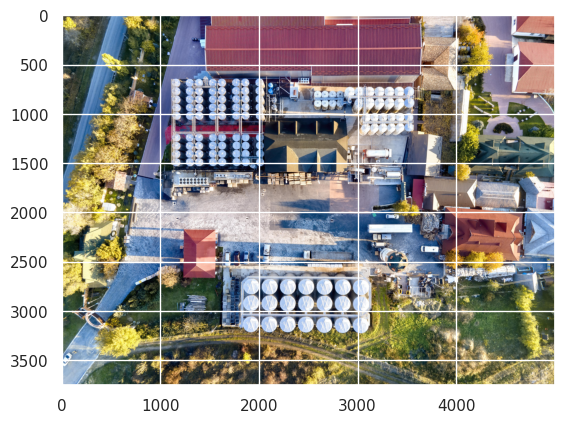

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Пути к изображениям
image_paths = ['/content/Foto_19.jpg', '/content/hotel.jpg', '/content/Foto_7.jpg']

# Загрузите изображения в формате PIL
images = [Image.open(path) for path in image_paths]

# Запустите пакетное инференс на загруженных изображениях
results = model2(images)  # Возвращает список объектов Results

# Обработайте список результатов
for i, result in enumerate(results):  # Добавим индекс для изображения
    # Boxes object для вывода bbox
    boxes = result.boxes
    # Masks object для сегментационных масок
    masks = result.masks

    # Визуализируйте результаты
    plt.figure()
    plt.imshow(images[i])  # Отображение изображения
    result.render()  # Визуализация bounding boxes и масок
    plt.show()  # Показать изображение с результатами

# Теперь вы можете использовать boxes, masks, keypoints и probs для дальнейшей обработки результатов.


In [ ]:
from ultralytics import YOLO

model2 = YOLO(weights='/content/best.pt')

# Display model information (optional)
model2.info()

ImportError: ignored

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Пути к изображениям
image_paths = ['/content/Foto_19.jpg', '/content/hotel.jpg', '/content/Foto_7.jpg']

# Загрузите изображения в формате PIL
images = [Image.open(path) for path in image_paths]

# Запустите пакетное инференс на загруженных изображениях
results = model2(images)  # Возвращает список объектов Results

# Обработайте список результатов
for i, result in enumerate(results):
    # Получите bounding boxes и маски
    boxes = result.boxes.tensor.cpu().numpy()
    masks = result.masks.tensor.cpu().numpy()

    # Отобразите изображение
    plt.figure()
    plt.imshow(images[i])

    # Визуализация bounding boxes
    for box in boxes:
        x, y, w, h = box
        plt.gca().add_patch(plt.Rectangle((x, y), w, h, fill=False, color='red'))

    # Визуализация масок
    for mask in masks:
        plt.imshow(np.squeeze(mask, axis=0), alpha=0.3, cmap='viridis')

    plt.show()



NameError: ignored

<Figure size 640x480 with 0 Axes>

In [ ]:
# Карта соответствия индексов классов и их имен
class_mapping = {
    0: 'Agricultural object',
    1: 'Fields',
    2: 'Forest',
    3: 'Grassland',
    4: 'Industrial facility',
    5: 'Power lines',
    6: 'Public facility',
    7: 'Residential facility',
    8: 'Road',
    9: 'Water'
}

# Список для хранения результатов в человекочитаемом формате
human_readable_results = []

# Перебираем каждый элемент в prediction_list
for detection in prediction_list:
    class_index = int(detection[0])  # Первое число в каждом результате - это индекс класса
    class_name = class_mapping[class_index]  # Получаем имя класса
    coordinates = detection[1:5]  # Второе, третье, четвертое и пятое числа - это координаты объекта
    confidence = detection[5]  # Шестое число - это уверенность в прогнозе

    # Добавляем информацию о каждом объекте в список в человекочитаемом формате
    human_readable_results.append({
        'Class': class_name,
        'Coordinates': coordinates,
        'Confidence': confidence
    })

# Теперь human_readable_results содержит человекочитаемую информацию о каждом обнаруженном объекте



NameError: ignored

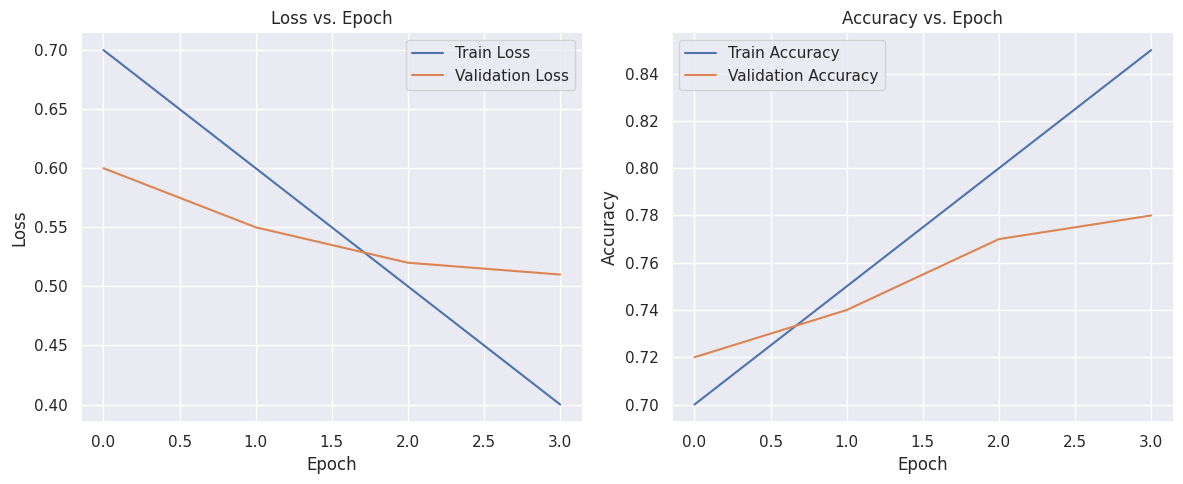

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os

# Создайте папку для сохранения графиков, если она еще не существует
save_folder = '/content/run'
os.makedirs(save_folder, exist_ok=True)

# Предположим, у нас есть следующие списки метрик
train_loss = [0.7, 0.6, 0.5, 0.4]
val_loss = [0.6, 0.55, 0.52, 0.51]
train_accuracy = [0.7, 0.75, 0.8, 0.85]
val_accuracy = [0.72, 0.74, 0.77, 0.78]

# Построение графиков
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epoch')
plt.savefig(os.path.join(save_folder, 'loss_vs_epoch.png'))

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Epoch')
plt.savefig(os.path.join(save_folder, 'accuracy_vs_epoch.png'))

plt.tight_layout()
plt.show()


In [ ]:
#Валидация
from ultralytics import YOLO


# Validate the model
model2.val()  # оцените производительность модели на наборе проверки
metrics = model2.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95(B)
metrics.box.map50  # map50(B)
metrics.box.map75  # map75(B)
metrics.box.maps   # a list contains map50-95(B) of each category
metrics.seg.map    # map50-95(M)
metrics.seg.map50  # map50(M)
metrics.seg.map75  # map75(M)
metrics.seg.maps   # a list contains map50-95(M) of each category

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
val: Scanning /content/dataset_1.0/valid/labels.cache... 1435 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1435/1435 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/dataset_1.0/valid/images/DS1_6-7_2270.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:17<00:00,  5.07it/s]
                   all       1435       4732      0.778       0.59      0.669      0.539      0.768      0.578      0.642      0.473
   Agricultural object       1435        173      0.803      0.896      0.915      0.809      0.807      0.896      0.917       0.81
                Fields       1435        661      0.933      0.879      0.932      0.866      0.937       0.88       0.93      0.855
                Forest       1435        752      0.831       0.71      0.797      0

AttributeError: ignored

In [ ]:
model2.predict(source="/content/hotel.jpg", save=True)  # предсказать по изображению


Results saved to runs/detect/predict


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([0, 6])
 dtype: torch.float32
  + tensor([], device='cuda:0', size=(0, 6))]

In [ ]:
model2.export(format="onnx")  # экспортируйте модель в формат ONNX

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

PyTorch: starting from /content/runs/train/weights/best.pt with output shape (1, 46, 8400) (22.7 MB)
requirements: YOLOv8 requirement "onnx>=1.12.0" not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 70.9 MB/s eta 0:00:00

requirements: 1 package updated per ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.14.1...


============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



ONNX: export success ✅ 7.8s, saved as /content/runs/train/weights/best.onnx (45.2 MB)

Export complete (7.9s)
Results saved to /content/runs/train/weights
Predict:         yolo task=segment mode=predict model=/content/runs/train/weights/best.onnx -WARNING ⚠️ not yet supported for YOLOv8 exported models
Validate:        yolo task=segment mode=val model=/content/runs/train/weights/best.onnx -WARNING ⚠️ not yet supported for YOLOv8 exported models
Visualize:       https://netron.app


In [ ]:
import zipfile

# Путь для упаковки, перенесем всю папку ранс на гугл драйв
folder_path = '/content/runs/'

# имя архива
zip_file = '/content/runs2.zip'

# Создайте архив
with zipfile.ZipFile(zip_file, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            arcname = os.path.relpath(file_path, folder_path)
            zipf.write(file_path, arcname=arcname)

print(f"Архив {zip_file} успешно создан.")


Архив /content/runs2.zip успешно создан.


In [ ]:
import zipfile

# Задайте путь к папке, которую вы хотите упаковать
folder_path = '/content/run/'

# Задайте имя архива
zip_file = '/content/run2.zip'

# Создайте архив
with zipfile.ZipFile(zip_file, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            arcname = os.path.relpath(file_path, folder_path)
            zipf.write(file_path, arcname=arcname)

print(f"Архив {zip_file} успешно создан.")


Архив /content/run2.zip успешно создан.


In [ ]:
import zipfile

# Задайте путь к папке, которую вы хотите упаковать
folder_path = '/content/runs/detect/predict'

# Задайте имя архива
zip_file = 'predict.zip'

# Создайте архив
with zipfile.ZipFile(zip_file, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            arcname = os.path.relpath(file_path, folder_path)
            zipf.write(file_path, arcname=arcname)

print(f"Архив {zip_file} успешно создан.")


Архив predict.zip успешно создан.


In [ ]:
import shutil

# Путь к созданному вами архиву
zip_file_path = '/content/run2.zip'

# Путь к месту на Google Drive, куда хотите переместить архив
drive_destination_path = '/content/drive/My Drive/'

# Скопируйте архив на Google Drive
shutil.copy(zip_file_path, drive_destination_path)

print(f"Архив {zip_file_path} успешно скопирован на Google Drive в папку {drive_destination_path}.")




Архив /content/run2.zip успешно скопирован на Google Drive в папку /content/drive/My Drive/.


In [ ]:
import shutil

# Путь к созданному вами архиву
zip_file_path = '/content/predict.zip'

# Путь к месту на Google Drive, куда хотите переместить архив
drive_destination_path = '/content/drive/My Drive/'

# Скопируйте архив на Google Drive
shutil.copy(zip_file_path, drive_destination_path)

print(f"Архив {zip_file_path} успешно скопирован на Google Drive в папку {drive_destination_path}.")




Архив /content/predict.zip успешно скопирован на Google Drive в папку /content/drive/My Drive/.


In [ ]:
import shutil

# Путь к созданному вами архиву
zip_file_path = '/content/runs2.zip'

# Путь к месту на Google Drive, куда хотите переместить архив
drive_destination_path = '/content/drive/My Drive/'

# Скопируйте архив на Google Drive
shutil.copy(zip_file_path, drive_destination_path)

print(f"Архив {zip_file_path} успешно скопирован на Google Drive в папку {drive_destination_path}.")




Архив /content/runs2.zip успешно скопирован на Google Drive в папку /content/drive/My Drive/.
